# Project3: Behavioral Cloning


## Instroduction
The goal for the Behavioral Cloning project is a self-driving. In the project, we want to design and develop a deep learning model to clone drving behavior to keep the car in the lanes. We collect data in the simulator provided by Udacity. In the simulator we recored not only three images each frame from three diffrent angles; left, middle, and right angles, but also steering angle, throttle, brake, and speed. For this project, we only need data of images and the steering angle. After collecting the data, the car is trained with the modified NVIDIA Model. Then, the model predicts steering angles in every frames, so that the car trained enables to drive autonomously.   

## Brief steps of the porject
- Collect the data of driving behavior from the driving simulator provided by Udacity
- Load the data collected from the simulater
- Build and train the model architecture of a convolutional neural network(CNN) in Keras to keep the car in the lanes 
- Test this model with two different tracks.


## Environment

### Hardware:

- CPU: i7 - 6700HQ

- GPU: GeForce GTX 960M

### Software:

- OS:  Windows 10 64bit


## Import Required Libraries

In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
import pandas as pd

## Load The Data

In [2]:
drive_log_path = pd.read_csv('./data/driving_log.csv')
drive_log_path.head()

,center,left,right,steering,throttle,brake,speed
0,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,0.000000,0.365003,0,0.583599
1,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,-0.050000,0.244737,0,0.869778
2,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,-0.250000,0.015020,0,0.978248
3,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,-0.372498,0.000000,0,0.974762
4,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,C:\Users\monst\Desktop\Self_Study\Self_Driving...,-0.090962,0.045780,0,0.981633


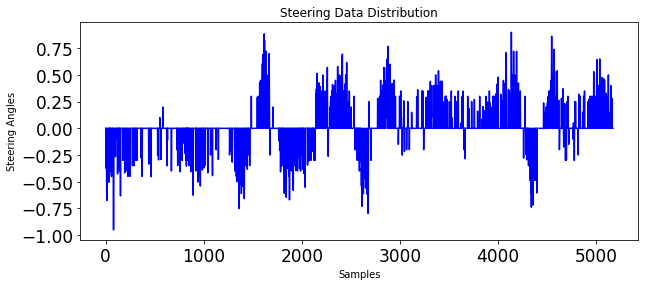

In [3]:
drive_log_path.steering.plot(title='Steering Data Distribution',
                             fontsize=17, figsize=(10, 4), color='b')
plt.xlabel('Samples')
plt.ylabel('Steering Angles')
plt.show()

This is the plot of steering angles on Track 1.

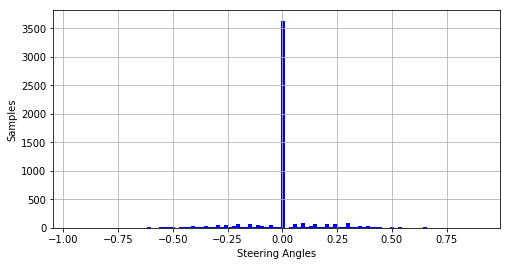

Dataset Size:  5173


In [4]:
plt.figure(figsize=(8,4))
drive_log_path.steering.hist(bins=100, color='b')
plt.xlabel('Steering Angles')
plt.ylabel('Samples')
plt.show()
print("Dataset Size: ", len(drive_log_path.steering))

The plot right above shows that the dataset is unbalanced

## Data Augmentation

### Reasons for the Augmentation

Data are collected by the simulator provied by Udacity. For the Track 1, there are not many bad conditions on the Track 1. For instance, road is not too winding, and there are not many shady places on the road of Track 1. In real world, however, road might be a lot more whinding, and there are more shady places on the road. With these kinds of conditions on the road, the car is more likely to get confused. 

### Use of Augmentaion Methods
- Adds left and right images, and then choose randomly images among left, center, and right images
- Flips and shifts frames
- Changes brightness of surroundings randomly
- Generates shaows randomly on the road

#### Choosing Randomly Left, Center, and Right Images
- We can use three different angle images to recover the car. We condsider that left angle camera is off the center of the road to the left. So we add an angle of 0.25 to the left camera to get this to be center. This goes the same with right angle camera, but we subtract the angle of 0.25 to get this to be center.

#### Flipping Images
- By flipping, we could not only have more data but also balance right and left angles.
- We need to reverse a +, - signs of steering angles when flips images

Output:
![title](flipped_image.png)

#### Generating Random Shaodws
- Random shadows are generated acrossing each images.

Output:
![title](random_shadow_4.png)

#### Random Translation
- By shifting images randomly, we can get more data
- In NVIDIA paer, it says that 'The steering label for transformed images is adjusted to one that would steer the vehicle back to the desired location and orientation in two seconds.' Thus, 0.004 angle per pixel is added or subtracted by shifting images left and right.
- Images are shifted vertically for the effect of driving up and down the slope. 

Output:
![title](random_translate_1.png)

#### Random Brightness
- Change brightness for the different conditions of brightness on the road. 

Output:
![title](random_brightness.png)

#### Output of all Augmentations
![title](augmentation.png)

## Model Architecture

### Nvidia Model
NVIDIA Model, 'End to End Learning for Self-Driving Cars' published in 2016
![CNN architecture](nvidia.jpg)

NVIDIA CNN architecture uses five convolutional layers with three fuully connected layers. The convolutional layers not only are desinged to do feature extraction but also are chosen emprically through a series of experiments that varies configurations. The three fully connected layers serve as a controller for steering.
The model architectures udsed for the behavioral cloning project are based on the Nvidia model probosed by Nvidia. 

source: https://arxiv.org/pdf/1604.07316.pdf

### My Model for Track 1

#### Table of Parameters

| Name of Parameters          | Size          | 
| :-------------------------- |:-------------:|
| EPOCHS                      | 25            | 
| BATCH_SIZE                  | 32            | 
| Learning_rate               | 0.001         |

#### Table of Modified NVIDIA Model:

Using TensorFlow backend.

| Length of Samples             | Sample #                             | 
| :---------------------------: | :----------------------------------: |
| Train samples                 | 4137                                 | 
| Validation samples            | 1035                                 | 

| Layer (type)              | Output Shape          | Param #          |
| :-----------------------: | :-------------------: | :--------------: | 
| cropping2d_1 (Cropping2D) | (None, 64, 320, 3)    | 0                |
| lambda_1 (Lambda)         | (None, 64, 160, 3)    | 0                |
| lambda_2 (Lambda)         | (None, 64, 160, 3)    | 0                |
| Conv2D_1 (Conv2D)         | (None, 30, 78, 24)    | 1824             |
| Conv2D_2 (Conv2D)         | (None, 13, 37, 36)    | 21636            | 
| Conv2D_3 (Conv2D)         | (None, 5, 17, 48)     | 43248            | 
| Conv2D_4 (Conv2D)         | (None, 3, 15, 64)     | 27712            |
| Conv2D_5 (Conv2D)         | (None, 1, 13, 64)     | 36928            | 
| flatten_1 (Flatten)       | (None, 832)           | 0                |
| Dense_1 (Dense)           | (None, 640)           | 533120           |
| Dropout_1 (Dropout)       | (None, 640)           | 0                |
| Dense_2 (Dense)           | (None, 320)           | 205120           |
| Dropout_2 (Dropout)       | (None, 320)           | 0                |
| Dense_3 (Dense)           | (None, 160)           | 51360            |
| Dropout_3 (Dropout)       | (None, 160)           | 0                |
| Dense_4 (Dense)           | (None, 80)            | 12880            |
| Dropout_4 (Dropout)       | (None, 80)            | 0                |
| Dense_5 (Dense)           | (None, 1)             | 81               |
 
| Name of Params            | Param #                                  | 
| :-----------------------: | :--------------------------------------: |
| Total params              | 933,909                                  | 
| Trainable params          | 933,909                                  | 
| Non-trainable params      | 0                                        | 

| Epoch #      | Time(s)      | Loss of Train   | Loss of Validation   |
| :----------: | :----------: | :-------------: | :------------------: | 
| 01, 130/130  | 216          | 0.0709          | 0.0467               |
| 02, 130/130  | 213          | 0.0514          | 0.0402               |
| 03, 130/130  | 212          | 0.0440          | 0.0345               |
| 04, 130/130  | 213          | 0.0385          | 0.0332               |
| 05, 130/130  | 211          | 0.0374          | 0.0318               |
| 06, 130/130  | 211          | 0.0365          | 0.0310               |
| 07, 130/130  | 210          | 0.0375          | 0.0307               |
| 08, 130/130  | 208          | 0.0350          | 0.0322               |
| 09, 130/130  | 208          | 0.0340          | 0.0309               |
| 10, 130/130  | 208          | 0.0344          | 0.0304               |
| 11, 130/130  | 212          | 0.0326          | 0.0327               |
| 12, 130/130  | 218          | 0.0334          | 0.0284               |
| 13, 130/130  | 214          | 0.0340          | 0.0287               |
| 14, 130/130  | 215          | 0.0333          | 0.0312               |
| 15, 130/130  | 214          | 0.0334          | 0.0328               |
| 16, 130/130  | 216          | 0.0326          | 0.0278               |
| 17, 130/130  | 213          | 0.0343          | 0.0279               |
| 18, 130/130  | 216          | 0.0310          | 0.0286               |
| 19, 130/130  | 217          | 0.0330          | 0.0309               |
| 20, 130/130  | 212          | 0.0327          | 0.0265               |
| 21, 130/130  | 217          | 0.0311          | 0.0270               |
| 22, 130/130  | 211          | 0.0319          | 0.0272               |
| 23, 130/130  | 213          | 0.0314          | 0.0301               |
| 24, 130/130  | 215          | 0.0317          | 0.0284               |
| 25, 130/130  | 224          | 0.0314          | 0.0319               |


Figure 1 of Mean Squared Error Loss
![title](Figure_17_1_25epchs_relu_track1.png)

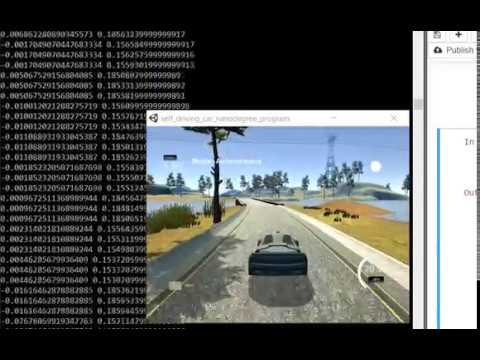

In [5]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo('CTcw2JEnEdI')

### My Model for Track 2 with Relu

#### Table of Parameters

| Name of Parameters          | Size          | 
| :-------------------------- |:-------------:|
| EPOCHS                      | 20            | 
| BATCH_SIZE                  | 32            | 
| Learning_rate               | 0.001         |

#### Table of Modified NVIDIA Model:

Using TensorFlow backend.

| Length of Samples             | Sample #                             | 
| :---------------------------: | :----------------------------------: |
| Train samples                 | 22899                                | 
| Validation samples            | 5725                                 | 

| Layer (type)              | Output Shape          | Param #          |
| :-----------------------: | :-------------------: | :--------------: | 
| cropping2d_1 (Cropping2D) | (None, 64, 320, 3)    | 0                |
| lambda_1 (Lambda)         | (None, 64, 160, 3)    | 0                |
| lambda_2 (Lambda)         | (None, 64, 160, 3)    | 0                |
| Conv2D_1 (Conv2D)         | (None, 30, 78, 24)    | 1824             |
| Conv2D_2 (Conv2D)         | (None, 13, 37, 36)    | 21636            | 
| Conv2D_3 (Conv2D)         | (None, 5, 17, 48)     | 43248            | 
| Conv2D_4 (Conv2D)         | (None, 3, 15, 64)     | 27712            |
| Conv2D_5 (Conv2D)         | (None, 1, 13, 64)     | 36928            | 
| flatten_1 (Flatten)       | (None, 832)           | 0                |
| Dense_1 (Dense)           | (None, 640)           | 533120           |
| Dropout_1 (Dropout)       | (None, 640)           | 0                |
| Dense_2 (Dense)           | (None, 320)           | 205120           |
| Dropout_2 (Dropout)       | (None, 320)           | 0                |
| Dense_3 (Dense)           | (None, 160)           | 51360            |
| Dropout_3 (Dropout)       | (None, 160)           | 0                |
| Dense_4 (Dense)           | (None, 80)            | 12880            |
| Dropout_4 (Dropout)       | (None, 80)            | 0                |
| Dense_5 (Dense)           | (None, 1)             | 81               |
 
| Name of Params            | Param #                                  | 
| :-----------------------: | :--------------------------------------: |
| Total params              | 933,909                                  | 
| Trainable params          | 933,909                                  | 
| Non-trainable params      | 0                                        | 

| Epoch #      | Time(s)      | Loss of Train   | Loss of Validation   |
| :----------: | :----------: | :-------------: | :------------------: | 
| 01, 716/716  | 1428         | 0.1962          | 0.1349               |
| 02, 716/716  | 1291         | 0.1484          | 0.1300               |
| 03, 716/716  | 1210         | 0.1390          | 0.1286               |
| 04, 716/716  | 1187         | 0.1276          | 0.1137               |
| 05, 716/716  | 1180         | 0.1230          | 0.1216               |
| 06, 716/716  | 1174         | 0.1223          | 0.1158               |
| 07, 716/716  | 1182         | 0.1238          | 0.1263               |
| 08, 716/716  | 1177         | 0.1186          | 0.1030               |
| 09, 716/716  | 1188         | 0.1136          | 0.1056               |
| 10, 716/716  | 1174         | 0.1133          | 0.1036               |
| 11, 716/716  | 1164         | 0.1209          | 0.1141               |
| 12, 716/716  | 1180         | 0.1147          | 0.0999               |
| 13, 716/716  | 1178         | 0.1208          | 0.1033               |
| 14, 716/716  | 1169         | 0.1135          | 0.1124               |
| 15, 716/716  | 1172         | 0.1162          | 0.1002               |
| 16, 716/716  | 1167         | 0.1168          | 0.0992               |
| 17, 716/716  | 1164         | 0.1120          | 0.1000               |
| 18, 716/716  | 1177         | 0.1127          | 0.1002               |
| 19, 716/716  | 1176         | 0.1099          | 0.0954               |
| 20, 716/716  | 1164         | 0.1100          | 0.0970               |


Figure 2 of Mean Squared Error Loss
![title](Figure_14_10_20epchs_relu.png)

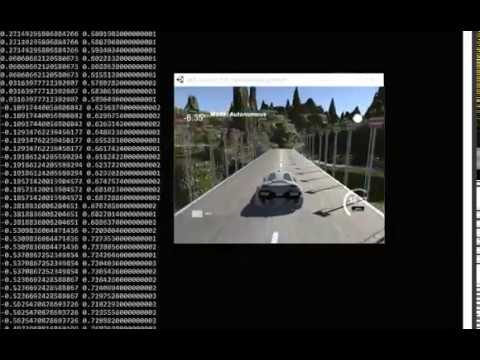

In [6]:
# Youtube
YouTubeVideo('suNWEu1mSbg')

### My Model for Track 2 with Leaky Relu

#### Table of Parameters

| Name of Parameters          | Size          | 
| :-------------------------- |:-------------:|
| EPOCHS                      | 25            | 
| BATCH_SIZE                  | 32            | 
| Learning_rate               | 0.001         |

#### Table of Modified NVIDIA Model:

Using TensorFlow backend.

| Length of Samples             | Sample #                             | 
| :---------------------------: | :----------------------------------: |
| Train samples                 | 22899                                | 
| Validation samples            | 5725                                 | 

| Layer (type)              | Output Shape          | Param #          |
| :-----------------------: | :-------------------: | :--------------: | 
| cropping2d_1 (Cropping2D) | (None, 64, 320, 3)    | 0                |
| lambda_1 (Lambda)         | (None, 64, 160, 3)    | 0                |
| lambda_2 (Lambda)         | (None, 64, 160, 3)    | 0                |
| Conv2D_1 (Conv2D)         | (None, 30, 78, 24)    | 1824             |
| LeakyReLU_1 (LeakyReLU)   | (None, 30, 78, 24)    | 0                |
| Conv2D_2 (Conv2D)         | (None, 13, 37, 36)    | 21636            |
| LeakyReLU_2 (LeakyReLU)   | (None, 13, 37, 36)    | 0                |
| Conv2D_3 (Conv2D)         | (None, 5, 17, 48)     | 43248            |
| LeakyReLU_3 (LeakyReLU)   | (None, 5, 17, 48)     | 0                |
| Conv2D_4 (Conv2D)         | (None, 3, 15, 64)     | 27712            |
| LeakyReLU_4 (LeakyReLU)   | (None, 3, 15, 64)     | 0                |
| Conv2D_5 (Conv2D)         | (None, 1, 13, 64)     | 36928            |
| LeakyReLU_5 (LeakyReLU)   | (None, 1, 13, 64)     | 0                |
| flatten_1 (Flatten)       | (None, 832)           | 0                |
| Dense_1 (Dense)           | (None, 640)           | 533120           |
| LeakyReLU_6 (LeakyReLU)   | (None, 640)           | 0                |
| Dropout_1 (Dropout)       | (None, 640)           | 0                |
| Dense_2 (Dense)           | (None, 320)           | 205120           |
| LeakyReLU_7 (LeakyReLU)   | (None, 320)           | 0                |
| Dropout_2 (Dropout)       | (None, 320)           | 0                |
| Dense_3 (Dense)           | (None, 160)           | 51360            |
| LeakyReLU_8 (LeakyReLU)   | (None, 160)           | 0                |
| Dropout_3 (Dropout)       | (None, 160)           | 0                |
| Dense_4 (Dense)           | (None, 80)            | 12880            |
| LeakyReLU_9 (LeakyReLU)   | (None, 80)            | 0                |
| Dropout_4 (Dropout)       | (None, 80)            | 0                |
| Dense_5 (Dense)           | (None, 1)             | 81               |
 
| Name of Params            | Param #                                  | 
| :-----------------------: | :--------------------------------------: |
| Total params              | 933,909                                  | 
| Trainable params          | 933,909                                  | 
| Non-trainable params      | 0                                        | 

| Epoch #      | Time(s)      | Loss of Train   | Loss of Validation   |
| :----------: | :----------: | :-------------: | :------------------: | 
| 01, 716/716  | 1180         | 0.1977          | 0.1443               |
| 02, 716/716  | 1091         | 0.1464          | 0.1272               |
| 03, 716/716  | 1090         | 0.1397          | 0.1218               |
| 04, 716/716  | 1088         | 0.1370          | 0.1246               |
| 05, 716/716  | 1085         | 0.1255          | 0.1079               |
| 06, 716/716  | 1089         | 0.1330          | 0.1099               |
| 07, 716/716  | 1468         | 0.1214          | 0.1086               |
| 08, 716/716  | 1419         | 0.1179          | 0.1087               |
| 09, 716/716  | 1447         | 0.1195          | 0.1041               |
| 10, 716/716  | 1479         | 0.1263          | 0.1106               |
| 11, 716/716  | 1303         | 0.1200          | 0.1134               |
| 12, 716/716  | 1244         | 0.1154          | 0.1023               |
| 13, 716/716  | 1225         | 0.1259          | 0.1051               |
| 14, 716/716  | 1191         | 0.1146          | 0.1160               |
| 15, 716/716  | 1196         | 0.1186          | 0.1138               |
| 16, 716/716  | 1170         | 0.1151          | 0.0979               |
| 17, 716/716  | 1262         | 0.1122          | 0.1002               |
| 18, 716/716  | 1398         | 0.1221          | 0.0959               |
| 19, 716/716  | 1362         | 0.1146          | 0.1072               |
| 20, 716/716  | 1337         | 0.1177          | 0.1151               |
| 21, 716/716  | 1345         | 0.1156          | 0.1127               |
| 22, 716/716  | 1351         | 0.1121          | 0.0990               |
| 23, 716/716  | 1369         | 0.1144          | 0.0953               |
| 24, 716/716  | 1349         | 0.1107          | 0.0996               |
| 25, 716/716  | 1442         | 0.1134          | 0.0988               |


Figure 3 of Mean Squared Error Loss
![title](Figure_14_11_25epchs_lekeyrelu.png)

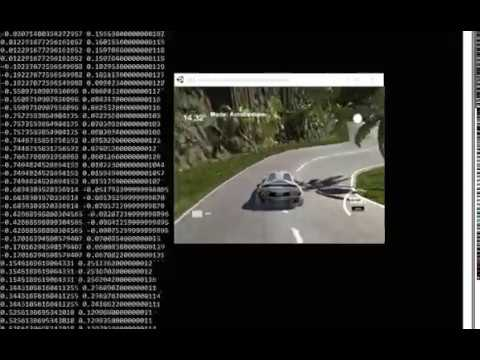

In [7]:
# Youtube
YouTubeVideo('PALdWdfh2RY')

### Oberservation

The fiure 1, 2, and 3 show that mean squared error loss for training and validation sets. Loss of training and validation sets are converged, but as we can see in figures, there are some spikes that miight result in overfitting. My model with ReLU activation gives pretty good performance for both Track 1 and 2. With Leaky relu activation for Track 2, it slightly gives the better performance. However, with Elu activation does not give the good results. Order of augmentations also affets the results of performance. For instance of my CNN model, the order of the augmentations; random shadow, random flip, random translation, and then random brightness gives the best results. The Track 2 is much more chanllenging since the road is a lot more meandering, and there are more up and down hills. In addition, there are also more shadows acrossing road. To get better performance, I need more augmentations for differnt randoms situations on the road. In my model for Track 2, it has more difficulty in the shaded boundaries. 
After more trainining those boundaries, my model can complete the more challenging track, Track 2.      

### Reflection

This behavioral cloning project was extremly challenging and takes a lot of time to train a model. It is however a great learning exercise. It also gives some ideas that it is hard to build a model to learn to drive in the real world.

### Video Links

- [Track 1 - YouTube Link](https://youtu.be/CTcw2JEnEdI)
- [Trak 2 with ReLU - YouTube Link](https://youtu.be/suNWEu1mSbg)
- [Track 2 with Leaky ReLU - YouTube Link](https://youtu.be/PALdWdfh2RY)

### Future Work 
- Better training data
- Better computing system
- Working on real environment

### Reference

- NVIDIA model: https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/
- Udacity Self-Driving Car Simulator: https://github.com/udacity/self-driving-car-sim
- https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9
- https://arxiv.org/pdf/1604.07316.pdf